In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('Student_Marks.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
df.duplicated().sum()

0

<Axes: >

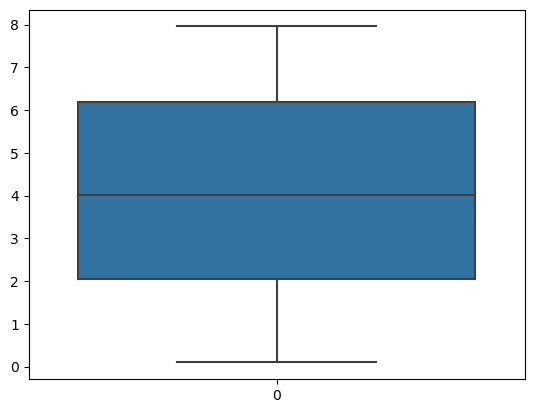

In [80]:
sns.boxplot(df['time_study'])

Дубликатов нет, пропусков в данных нет, выбросов нет

In [6]:
df.columns = df.columns.str.lower() # приведем заголовки к единому формату
df.columns

Index(['number_courses', 'time_study', 'marks'], dtype='object')

Добавление фиктивных переменных

In [7]:
# создадим фиктивные переменные
dummy = pd.get_dummies(df['number_courses'], prefix='cours')

In [8]:
# добавим фиктивные переменные в датасет
date = pd.concat([df.drop(columns='number_courses'), dummy], axis=1)

In [9]:
date

,time_study,marks,cours_3,cours_4,cours_5,cours_6,cours_7,cours_8
0,4.508,19.202,1,0,0,0,0,0
1,0.096,7.734,0,1,0,0,0,0
2,3.133,13.811,0,1,0,0,0,0
3,7.909,53.018,0,0,0,1,0,0
4,7.811,55.299,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
95,3.561,19.128,0,0,0,1,0,0
96,0.301,5.609,1,0,0,0,0,0
97,7.163,41.444,0,1,0,0,0,0
98,0.309,12.027,0,0,0,0,1,0


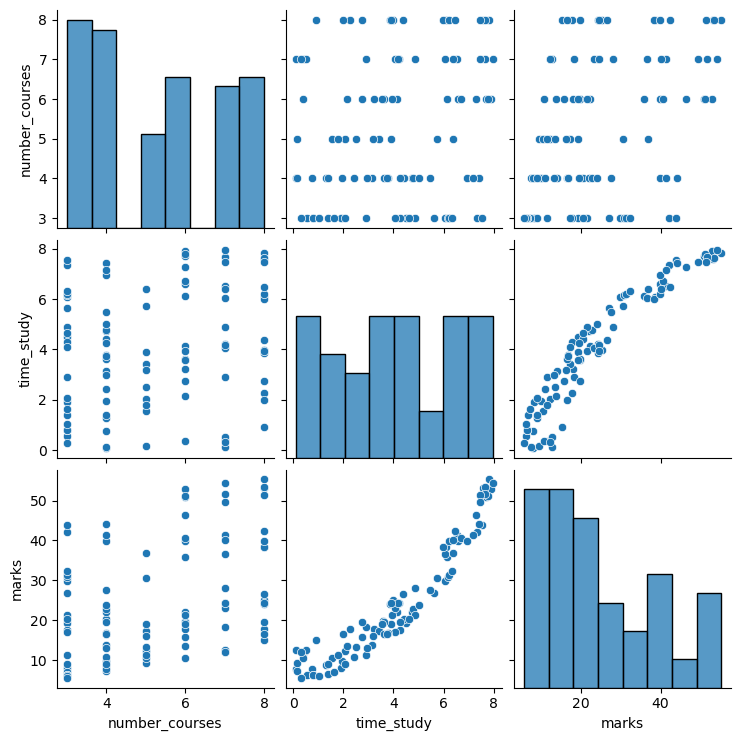

In [10]:
# строим pairplot, посмотрим как выглядят данные
sns.pairplot(df)

###### Линейная модель

In [76]:
x = df['time_study']
y = df['marks']

# преобразуем x  в одномерный массив Numpy
x = np.array(x).reshape(-1, 1)
 
# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

#разделяем данные на обучающую и валидационную выборку с random_state=13
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13) 

#стандартизируем переменные
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

# делаем прогнозы
predictions = model.predict(x_test_st)

r2 = r2_score(y_test, predictions)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.9431962709294611
Среднеквадратическая ошибка (MSE): 10.633617886976149


In [57]:
date.columns

Index(['time_study', 'marks', 'cours_3', 'cours_4', 'cours_5', 'cours_6',
       'cours_7', 'cours_8'],
      dtype='object')

In [77]:
x = date[['time_study','cours_3', 'cours_4', 'cours_5', 'cours_6',
       'cours_7', 'cours_8']]
y = date['marks']

# преобразуем x  в одномерный массив Numpy
x = np.array(x)
 
# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

#разделяем данные на обучающую и валидационную выборку с random_state=13
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#стандартизируем переменные
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

# делаем прогнозы
predictions = model.predict(x_test_st)

r2 = r2_score(y_test, predictions)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.9561682273918803
Среднеквадратическая ошибка (MSE): 8.20527681632981


###### Гипербола

In [78]:
df_hip = df.copy()
x = ['time_study']
for i in x:
    df_hip = df_hip[df_hip[i] != 0]
    df_hip[i] = 1 / df_hip[i]

In [79]:
hip_model = LinearRegression()
x = df_hip[['number_courses', 'time_study']]
y = df_hip['marks']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
hip_model.fit(x_train, y_train)
y_pred = hip_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.2343088356910703
Среднеквадратическая ошибка (MSE): 147.20333995176944


###### Парабола

In [61]:
df_par = df.copy()
x = pd.DataFrame()
x_c = ['time_study']
for c in x_c:
    df_par[f'{c}^2'] = df_par[c] ** 2
    x[c] = df_par[c]
    x[f'{c}^2'] = df_par[f'{c}^2']

In [62]:
par_model = LinearRegression()
x = df_par[['number_courses', 'time_study']]    # независимые переменные
y = df_par[['marks']]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
hip_model.fit(x_train, y_train)
y_pred = hip_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.9420722851428084
Среднеквадратическая ошибка (MSE): 12.540851136177054


In [63]:
df_par = date.copy()
x = pd.DataFrame()
for c in x_c:
    df_par[f'{c}^2'] = df_par[c] ** 2
    x[c] = df_par[c]
    x[f'{c}^2'] = df_par[f'{c}^2']

In [64]:
par_model = LinearRegression()
x_c_date = ['time_study','cours_3', 'cours_4', 'cours_5', 'cours_6',
       'cours_7', 'cours_8']
x = df_par[x_c_date]    # независимые переменные
y = df_par[['marks']]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
hip_model.fit(x_train, y_train)
y_pred = hip_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.9404887874887075
Среднеквадратическая ошибка (MSE): 12.883664734184883


###### Полулогарифмическая модель

In [65]:
df_log = date.copy()
for c in x_c:
    df_log = df_log[df_log[c] > 0]
    df_log[c] = np.log(df_log[c])

In [66]:
log_model = LinearRegression()
x = df_log[x_c_date]    # независимые переменные
y = df_log[['marks']]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.6144680227588748
Среднеквадратическая ошибка (MSE): 83.46435116138038


###### Степенная

In [30]:
df_st = date.copy()
for c in x_c:
    df_st = df_st[df_st[c] > 0]
    df_st[c] = np.log(df_st[c])
df_st['marks'] = np.log(df_st['marks'])

In [71]:
st_model = LinearRegression()
x = df_st[x_c]    # независимые переменные
y = df_st[["marks"]]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
st_model.fit(x_train, y_train)
y_pred = st_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.6759350020541407
Среднеквадратическая ошибка (MSE): 0.1335151546351894


In [72]:
st_model = LinearRegression()
x = df_st[x_c_date]    # независимые переменные
y = df_st[["marks"]]    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
st_model.fit(x_train, y_train)
y_pred = st_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.7784453525701922
Среднеквадратическая ошибка (MSE): 0.09128077144782436


###### Показательная

In [74]:
df_pok = date.copy()
pok_model = LinearRegression()
x = df_pok[x_c_date]    # независимые переменные
y = np.log(df_pok[["marks"]])    # зависимая переменная
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
pok_model.fit(x_train, y_train)
y_pred = pok_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)

Коэффициент детерминации (R^2): 0.9757772076906533
Среднеквадратическая ошибка (MSE): 0.009979818497457138


###### Благодарю за внимание!